<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
path = '/content/drive/MyDrive/mldata/Boston_house.csv'

In [44]:
df = pd.read_csv(path)
data = df.drop('Target',axis=1)
label = df['Target']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
ridge = Ridge()
ns = cross_val_score(ridge,data,label,scoring='neg_mean_squared_error',cv=5)
rmse = np.sqrt(-1 * ns)
rmse.mean()

5.6525709656135446

In [49]:
ridge = Ridge(alpha=10)
ns = cross_val_score(ridge,data,label,scoring='neg_mean_squared_error',cv=5)
rmse = np.sqrt(-1 * ns)
rmse.mean()

5.518166280868967

In [50]:
alphas = [0.0001,0.01,0.1,1,2,5,10]
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train,y_train)
  print(f'{alpha:7.4f}: {ridge.score(x_test,y_test)}')

 0.0001: 0.7533570828889067
 0.0100: 0.7533939733856243
 0.1000: 0.753632643177108
 1.0000: 0.7529069080214765
 2.0000: 0.7516871312643697
 5.0000: 0.7501188264274307
10.0000: 0.7491224181001079


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
params = {
    'alpha':[0.0001,0.01,0.1,1,2,5,10]
}

In [53]:
ridge = Ridge()
gs = GridSearchCV(ridge,param_grid=params)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'alpha': 0.1}


In [54]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
ridge.score(x_test,y_test)

0.753632643177108

In [55]:
dir(ridge)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'alpha',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'positive',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [56]:
model = gs.best_estimator_
pred = model.predict(x_test)
model.score(x_test,y_test)

0.753632643177108

In [57]:
alphas = [0.0001,0.01,0.1,1,2,5,10]
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  sc = cross_val_score(ridge,x_train,y_train,cv=5)
  print(f'{alpha:7.4f}',np.mean(sc))

 0.0001 0.6885172518715865
 0.0100 0.6886275530000738
 0.1000 0.6893607515896678
 1.0000 0.6888611569200476
 2.0000 0.68699254252234
 5.0000 0.6841910583208699
10.0000 0.6821508069007092


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss = StandardScaler()
ss.fit(data)
sd = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(sd,label)

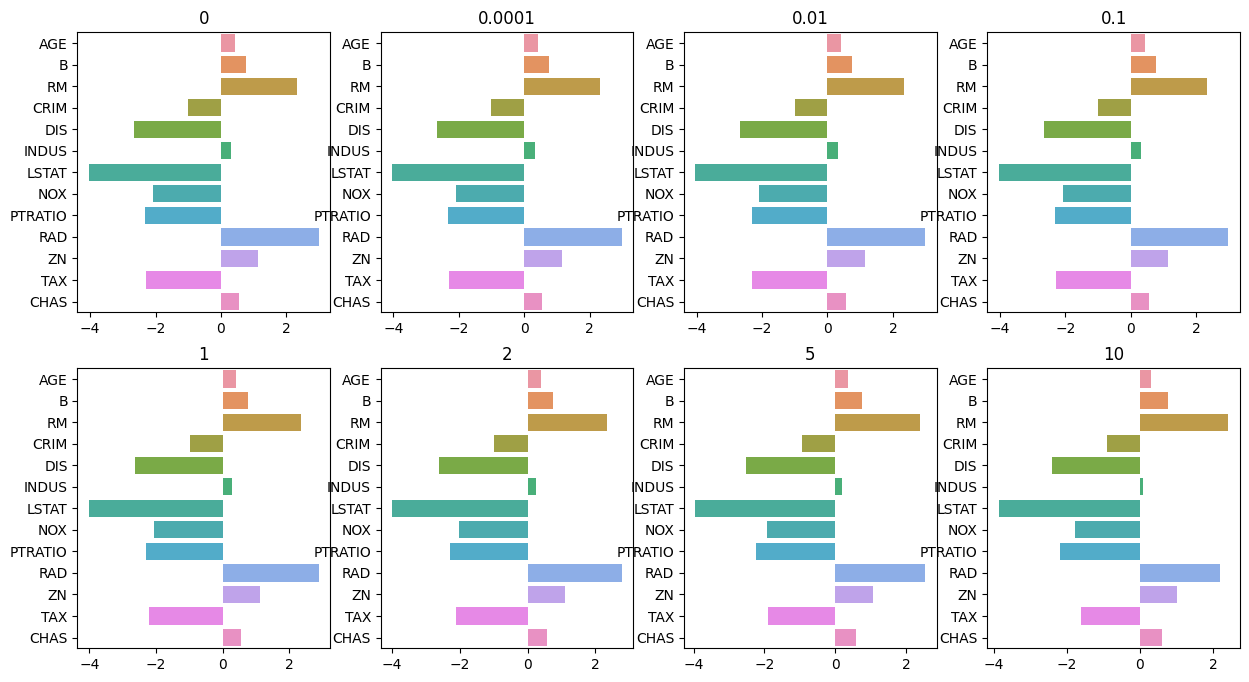

In [60]:
import seaborn as sns
alphas = [0,0.0001,0.01,0.1,1,2,5,10]
rdf = pd.DataFrame()
_,axs = plt.subplots(nrows=2,ncols=4,figsize=(15,8))
for i,alpha in enumerate(alphas):
  nr = int(i/4)
  nc = i%4
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train,y_train)
  cs = pd.Series(ridge.coef_,index=data.columns)
  rdf[str(alpha)] = cs
  sns.barplot(x=cs.values,y=cs.index,ax=axs[nr][nc])
  axs[nr][nc].set_title(str(alpha))
plt.show()

In [63]:
from sklearn.linear_model import Lasso,ElasticNet

In [64]:
alphas = [0.0001,0.01,0.1,1,2,5,10]

for alpha in alphas:
  model = Ridge(alpha=alpha)
  sc = cross_val_score(model,x_train,y_train,cv=5)
  print(f'{alpha:7.4f}',np.mean(sc))
print("\n===================")
for alpha in alphas:
  model = Lasso(alpha=alpha)
  sc = cross_val_score(model,x_train,y_train,cv=5)
  print(f'{alpha:7.4f}',np.mean(sc))
print("\n===================")
for alpha in alphas:
  model = ElasticNet(alpha=alpha)
  sc = cross_val_score(model,x_train,y_train,cv=5)
  print(f'{alpha:7.4f}',np.mean(sc))

 0.0001 0.6956333425651968
 0.0100 0.6956394206205995
 0.1000 0.6956940755759057
 1.0000 0.6961853436570309
 2.0000 0.6966288266716153
 5.0000 0.6974890669294034
10.0000 0.6979742556995671

 0.0001 0.6956381848364047
 0.0100 0.6962163612699859
 0.1000 0.6951133147363017
 1.0000 0.6533567431242516
 2.0000 0.5936198402486851
 5.0000 0.276966876643843
10.0000 -0.007174760949336623

 0.0001 0.6956450394077602
 0.0100 0.6966518743051497
 0.1000 0.696147386835235
 1.0000 0.6280751345482651
 2.0000 0.5509093320308469
 5.0000 0.31415877442516055
10.0000 0.07228716420885821


In [66]:
print("\n=======Ridge============")
for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(x_train,y_train)
  print(f'{alpha:7.4f}',model.coef_)
print("\n========Lasso===========")
for alpha in alphas:
  model = Lasso(alpha=alpha)
  model.fit(x_train,y_train)
  print(f'{alpha:7.4f}',model.coef_)
print("\n========ElasticNet===========")
for alpha in alphas:
  model = ElasticNet(alpha=alpha)
  model.fit(x_train,y_train)
  print(f'{alpha:7.4f}',model.coef_)


=======Ridge============
 0.0001 [ 0.42533141  0.7614968   2.32662297 -1.00312795 -2.6613384   0.31512921
 -4.03421291 -2.08416834 -2.31560605  2.98769699  1.14412868 -2.29718202
  0.5532726 ]
 0.0100 [ 0.42519441  0.76149044  2.32675204 -1.00300854 -2.66104949  0.31482345
 -4.03402845 -2.083804   -2.31544926  2.98662932  1.14396812 -2.29619854
  0.55333378]
 0.1000 [ 0.42395202  0.76143278  2.32792172 -1.00192624 -2.65842557  0.31205502
 -4.03235376 -2.08049811 -2.31402668  2.9769596   1.14251258 -2.28729571
  0.55388782]
 1.0000 [ 0.41182893  0.76086713  2.3392637  -0.99141613 -2.63243739  0.28544386
 -4.01581758 -2.04804839 -2.30006106  2.88372712  1.12835091 -2.20187118
  0.55923068]
 2.0000 [ 0.39896293  0.76025853  2.35115183 -0.98036266 -2.60409544  0.25799459
 -3.99787014 -2.01324151 -2.28507082  2.78699137  1.11340219 -2.11406389
  0.56477565]
 5.0000 [ 0.36368607  0.75851372  2.3828688  -0.9505843  -2.52238722  0.18682678
 -3.94641292 -1.91600209 -2.2430552   2.53316758  1.0